In [1]:
from datetime import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('Philly_weather.csv')  
data.dropna(inplace=True)

In [3]:
data.shape

(44625, 7)

In [4]:
data.head(10)

,datetime,humidity,pressure,temperature,wind-direction,wind-speed,weather-description
1,2012-10-01 13:00:00,71.0,1014.0,285.630000,270.0,4.0,broken clouds
2,2012-10-01 14:00:00,70.0,1014.0,285.663208,270.0,4.0,broken clouds
3,2012-10-01 15:00:00,70.0,1014.0,285.756824,271.0,3.0,broken clouds
4,2012-10-01 16:00:00,69.0,1014.0,285.850440,272.0,3.0,broken clouds
5,2012-10-01 17:00:00,69.0,1014.0,285.944057,274.0,3.0,broken clouds
6,2012-10-01 18:00:00,68.0,1014.0,286.037673,275.0,3.0,broken clouds
7,2012-10-01 19:00:00,68.0,1014.0,286.131290,276.0,3.0,broken clouds
8,2012-10-01 20:00:00,67.0,1014.0,286.224906,277.0,3.0,broken clouds
9,2012-10-01 21:00:00,67.0,1014.0,286.318522,279.0,3.0,broken clouds
10,2012-10-01 22:00:00,66.0,1014.0,286.412139,280.0,3.0,broken clouds


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44625 entries, 1 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             44625 non-null  object 
 1   humidity             44625 non-null  float64
 2   pressure             44625 non-null  float64
 3   temperature          44625 non-null  float64
 4   wind-direction       44625 non-null  float64
 5   wind-speed           44625 non-null  float64
 6   weather-description  44625 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.7+ MB


In [6]:
data["day"] = pd.to_datetime(data['datetime'], format='%Y-%m-%d').dt.day

In [7]:
data.head(20)

,datetime,humidity,pressure,temperature,wind-direction,wind-speed,weather-description,day
1,2012-10-01 13:00:00,71.0,1014.0,285.630000,270.0,4.0,broken clouds,1
2,2012-10-01 14:00:00,70.0,1014.0,285.663208,270.0,4.0,broken clouds,1
3,2012-10-01 15:00:00,70.0,1014.0,285.756824,271.0,3.0,broken clouds,1
4,2012-10-01 16:00:00,69.0,1014.0,285.850440,272.0,3.0,broken clouds,1
5,2012-10-01 17:00:00,69.0,1014.0,285.944057,274.0,3.0,broken clouds,1
6,2012-10-01 18:00:00,68.0,1014.0,286.037673,275.0,3.0,broken clouds,1
7,2012-10-01 19:00:00,68.0,1014.0,286.131290,276.0,3.0,broken clouds,1
8,2012-10-01 20:00:00,67.0,1014.0,286.224906,277.0,3.0,broken clouds,1
9,2012-10-01 21:00:00,67.0,1014.0,286.318522,279.0,3.0,broken clouds,1
10,2012-10-01 22:00:00,66.0,1014.0,286.412139,280.0,3.0,broken clouds,1


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.day, data.temperature)

In [9]:
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [10]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [11]:
y_test.head(20)

28318    289.480000
44865    279.810000
24741    294.450000
7452     293.360000
3103     276.320000
27124    290.315700
23556    296.221000
16383    291.538000
11425    275.040000
40549    300.940000
13984    285.170000
30024    270.626209
12237    276.590000
4701     278.340000
11176    269.650000
8840     301.360000
33027    303.500000
7588     297.940000
39841    285.150000
33477    296.030000
Name: temperature, dtype: float64

In [12]:
y_train.head(20)

15031    294.222667
2675     279.150000
41527    297.370000
35313    290.908000
35524    295.935000
38497    273.220000
3086     272.870000
29038    267.982356
14754    290.040000
37366    270.700000
27921    281.692352
44748    279.890000
3272     279.630000
19977    271.463500
12541    275.240000
39562    284.880000
37529    281.080000
43241    288.640000
38762    269.420000
20420    271.570667
Name: temperature, dtype: float64

In [13]:
preds

array([285.4160245 , 285.44584565, 285.40608411, ..., 285.4160245 ,
       285.4135394 , 285.40111392])

In [14]:
residuals = preds - y_test

In [15]:
#plt.hist(residuals)

In [16]:
data['day_of_year'] = data.day
plt.scatter(data['day_of_year'], data.temperature)
#plt.plot(data['day_of_year'], preds, color='red')

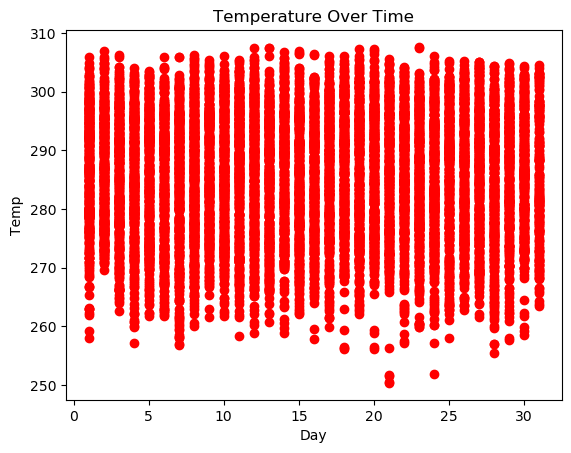

In [22]:
plt.scatter(x_test, y_test, color = "red")
plt.title("Temperature Over Time")
plt.xlabel("Day")
plt.ylabel("Temp")
plt.show()

In [24]:
data.reshape(-1, 1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [21]:
score = regr.score(data.day, data.temperature)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  1  1 ... 29 29 30].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.